In [ ]:
 import pandas as pd
#df=pd.read_excel(r'C:/Users/Ganguli/Desktop/ML TOC/Badr El Din(Egypt)/Core & Logs_BED-1-11.xlsx',sheet_name='Sheet1')
df=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Core & Logs_BED-1-11.xlsx',sheet_name='Sheet1')
df

,Depth (m),Perm_Hor (mD),Perm_Vert (mD),Core_Porosity (%),GrainDensity (g/cc),GR (API),Resistivity (Ohm-m),DT (us/m),NPHI (v/v),RHOB (g/cc)
0,3515.3,10.0,1.7,15.1,2.68,61.2095,28.0206,224.3873,0.1490,2.4649
1,3515.6,21.0,21.0,16.6,2.66,64.6865,44.1600,222.2495,0.1357,2.4312
2,3515.9,17.0,16.0,12.1,2.70,61.3113,36.4344,220.2878,0.1548,2.4915
3,3516.2,29.0,11.0,18.0,2.66,53.5300,29.2139,221.7177,0.1891,2.5460
4,3516.5,18.0,16.0,14.4,2.71,48.2833,29.3445,222.6750,0.1868,2.4761
...,...,...,...,...,...,...,...,...,...,...
90,3646.6,852.0,267.0,14.5,2.65,25.6514,1.1417,219.3568,0.0953,2.3953
91,3646.9,204.0,94.0,10.7,2.65,29.9153,1.1024,219.5200,0.0899,2.3962
92,3647.5,758.0,447.0,14.2,2.65,30.0438,1.0307,218.1873,0.0930,2.4118
93,3647.8,330.0,93.0,12.9,2.66,24.4682,0.9792,220.0291,0.1128,2.4065


Text(0.5, 1.0, 'Heatmap Plot')

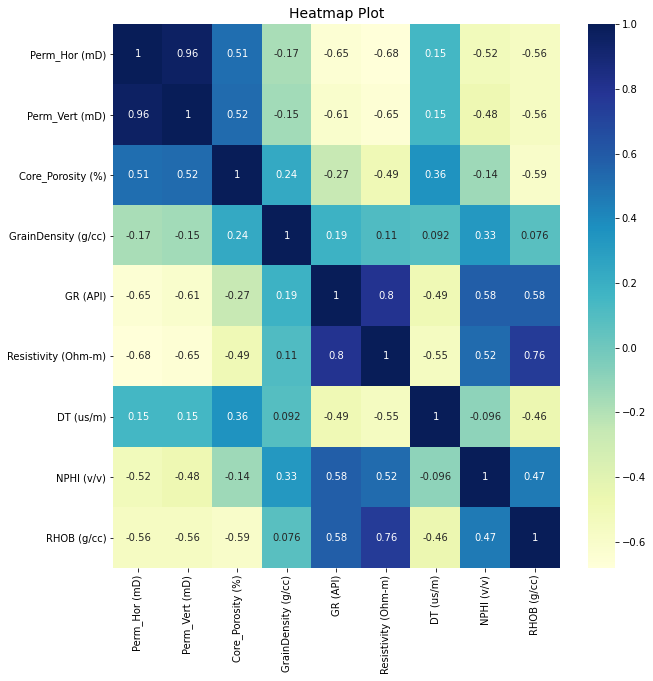

In [ ]:
# Heatmap plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(df.drop(['Depth (m)'],axis=1).corr(), annot=True,cmap="YlGnBu")
plt.title('Heatmap Plot',fontsize=14)

#plt.savefig('Heatmap.jpg', dpi=600)

In [ ]:
df22=df.drop(['GrainDensity (g/cc)','DT (us/m)'],axis=1)

In [ ]:
import numpy as np
import pandas as pd
#df1=pd.read_excel(r'C:/Users/Ganguli/Desktop/ML TOC/Badr El Din(Egypt)/clastic_perm_result.xlsx',sheet_name='PSO-NN')
#df1=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/shib_ganguli/clastic_perm_result.xlsx',sheet_name='PSO-NN')
df1=pd.read_excel(r'/content/clastic_result_modified.xlsx',sheet_name='pso')
df1.head()

,y_train_H,pred_train_H,y_test_H,pred_test_H,Unnamed: 4,Unnamed: 5,Unnamed: 6,y_train_v,pred_train_v,y_test_v,pred_test_v,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,pso_h,RMSE,MAE,R2,CORR,MAPE,STDE,MRE
0,10.0,1.104786,21.0,-33.386314,NaN,NaN,NaN,1.7,-0.959938,21.00,-11.864936,NaN,NaN,NaN,NaN,train,76.3853,42.717,0.906173,0.952027,9.91543,77.0084,3.43183
1,29.0,102.925533,17.0,-3.485304,NaN,NaN,NaN,11.0,42.362162,16.00,-17.187180,NaN,NaN,NaN,NaN,test,100.832,65.1727,0.786056,0.886816,13.4839,102.362,11.2281
2,18.0,17.386700,27.0,2.117532,NaN,NaN,NaN,16.0,8.532773,24.00,1.505446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.0,52.576861,9.0,92.320275,NaN,NaN,NaN,43.0,51.427436,0.68,33.480040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76.0,67.452738,5.0,57.577298,NaN,NaN,NaN,43.0,51.950683,0.24,-10.406582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_train1=df1['y_train_H'][:62]
y_test1=df1['y_test_H'][:33]
pred_tr1=df1['pred_train_H'][:62]
pred_ts1=df1['pred_test_H'][:33]

In [ ]:
y_train2=df1['y_train_v']
y_test2=df1['y_test_v'][:29]
pred_tr2=df1['pred_train_v']
pred_ts2=df1['pred_test_v'][:29]

In [ ]:
max(y_test2-pred_ts2)

84.88225874155118

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


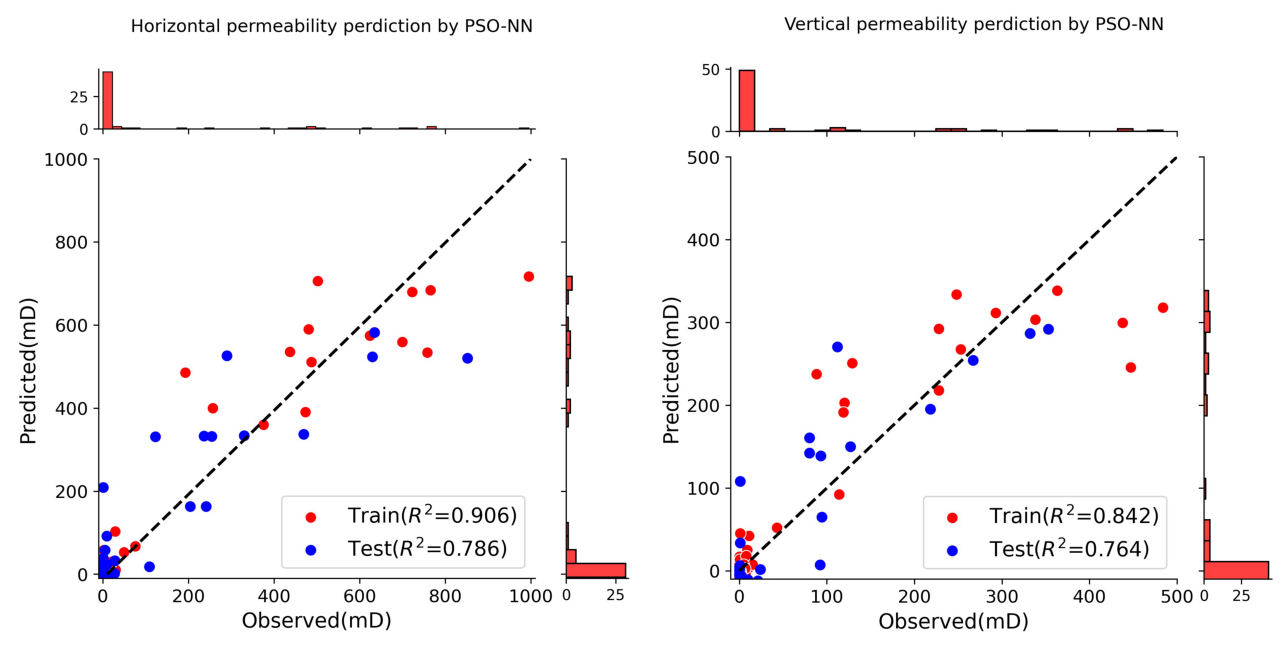

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
# Horizontal pso-nn plot

df15 = pd.DataFrame({'Observed': y_train1, 'Predicted':pred_tr1})
df25 = pd.DataFrame({'Observed': y_test1, 'Predicted':pred_ts1})
graph1 = sns.jointplot(x=df15.Observed, y=df15.Predicted, color='r',xlim=(-10,1010),ylim=(-10,1000),s=60,marginal_ticks=True,space=0.5)

graph1.x = df25.Observed
graph1.y = df25.Predicted
graph1.plot_joint(plt.scatter, marker='o', c='b', s=40)
plt.legend(['Train($R^2$=0.906)','Test($R^2$=0.786)'],fontsize=14,loc='lower right' )
graph1.ax_joint.plot((10,1000),(0,1000),'k--',lw=2)
plt.xlabel('Observed(mD)', fontsize=14)
plt.ylabel('Predicted(mD)', fontsize=14)
plt.tick_params(axis="both", labelsize=12)
plt.suptitle('Horizontal permeability perdiction by PSO-NN')
plt.tight_layout(pad=8.0)
plt.subplots_adjust(top=0.9)
graph1.savefig('graph1.jpg',dpi=300)
plt.close(graph1.fig)
# Vertical pso-nn plot

df15 = pd.DataFrame({'Observed': y_train2, 'Predicted':pred_tr2})
df25 = pd.DataFrame({'Observed': y_test2, 'Predicted':pred_ts2})
graph2 = sns.jointplot(x=df15.Observed, y=df15.Predicted, color='r',xlim=(-10,500),ylim=(-10,500),s=60,marginal_ticks=True,space=0.4)

graph2.x = df25.Observed
graph2.y = df25.Predicted
graph2.plot_joint(plt.scatter, marker='o', c='b', s=40)

plt.legend(['Train($R^2$=0.842)','Test($R^2$=0.764)'],fontsize=14,loc='lower right' )
graph2.ax_joint.plot((0,1000),(0,1000),'k--',lw=2)
plt.xlabel('Observed(mD)', fontsize=14)
plt.ylabel('Predicted(mD)', fontsize=14)
plt.tick_params(axis="both", labelsize=12)
plt.suptitle('Vertical permeability perdiction by PSO-NN')
plt.tight_layout(pad=8.0)
plt.subplots_adjust(top=0.9)
graph2.savefig('graph2.jpg',dpi=300)
plt.close(graph2.fig)

f, axarr = plt.subplots(1, 2, figsize=(18, 16))
import matplotlib.image as mpimg
axarr[0].imshow(mpimg.imread('graph1.jpg'))
axarr[1].imshow(mpimg.imread('graph2.jpg'))
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()
plt.show()

In [ ]:
#df2=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/shib_ganguli/clastic_perm_result.xlsx',sheet_name='LSSVM')
df2=pd.read_excel(r'/content/clastic_result_modified.xlsx',sheet_name='lssvm')
df2

,y_train_H,pred_train_H,y_test_H,pred_test_H,Unnamed: 4,Unnamed: 5,Unnamed: 6,y_train_v,pred_train_v,y_test_v,pred_test_v,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,lssvm_h,RMSE,MAE,R2,CORR,MAPE,STDE,MRE
0,10.0,5.332921,21.0,18.843116,NaN,NaN,NaN,1.7,5.014475,11.00,11.589989,NaN,NaN,NaN,NaN,train,67.2091,34.0369,0.927362,0.963204,9.87856,67.6929,2.05096
1,29.0,29.175956,17.0,7.986088,NaN,NaN,NaN,21.0,6.842624,16.00,13.765933,NaN,NaN,NaN,NaN,test,83.6018,50.8768,0.852926,0.923984,11.6896,84.7125,6.4005
2,18.0,11.500015,27.0,-0.192147,NaN,NaN,NaN,16.0,11.016081,0.68,38.675820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.0,44.172637,9.0,15.115059,NaN,NaN,NaN,24.0,0.251893,2.90,0.611515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76.0,71.954574,5.0,82.670415,NaN,NaN,NaN,43.0,31.590418,2.50,-4.843013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,758.0,523.245808,NaN,NaN,NaN,NaN,NaN,338.0,268.732341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.0,239.436949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,93.438805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,101.601431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_train3=df2['y_train_H'][:62]
y_test3=df2['y_test_H'][:33]
pred_tr3=df2['pred_train_H'][:62]
pred_ts3=df2['pred_test_H'][:33]

In [ ]:
y_train4=df2['y_train_v']
y_test4=df2['y_test_v'][:29]
pred_tr4=df2['pred_train_v']
pred_ts4=df2['pred_test_v'][:29]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


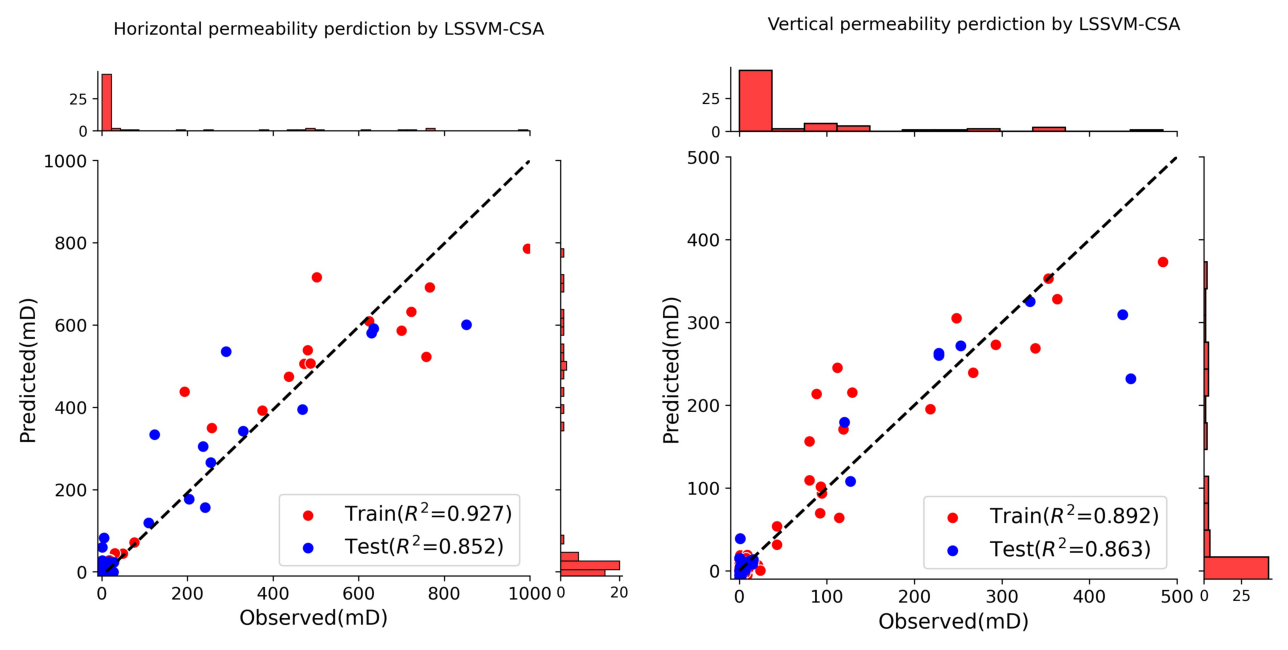

In [ ]:

# Horizontal LSSVN-CSA plot

df15 = pd.DataFrame({'Observed': y_train3, 'Predicted':pred_tr3})
df25 = pd.DataFrame({'Observed': y_test3, 'Predicted':pred_ts3})
graph1 = sns.jointplot(x=df15.Observed, y=df15.Predicted, color='r',xlim=(-10,1000),ylim=(-10,1000),s=60,marginal_ticks=True,space=0.5)

graph1.x = df25.Observed
graph1.y = df25.Predicted
graph1.plot_joint(plt.scatter, marker='o', c='b', s=40)
plt.legend(['Train($R^2$=0.932)','Test($R^2$=0.866)'],fontsize=14,loc='lower right' )
graph1.ax_joint.plot((10,1000),(0,1000),'k--',lw=2)
plt.xlabel('Observed(mD)', fontsize=14)
plt.ylabel('Predicted(mD)', fontsize=14)
plt.tick_params(axis="both", labelsize=12)
plt.suptitle('Horizontal permeability perdiction by LSSVM-CSA')
plt.tight_layout(pad=8.0)
plt.subplots_adjust(top=0.9)
graph1.savefig('graph1.jpg',dpi=300)
plt.close(graph1.fig)
# Vertical LSSVM-CSA plot

df15 = pd.DataFrame({'Observed': y_train4, 'Predicted':pred_tr4})
df25 = pd.DataFrame({'Observed': y_test4, 'Predicted':pred_ts4})
graph2 = sns.jointplot(x=df15.Observed, y=df15.Predicted, color='r',xlim=(-10,500),ylim=(-10,500),s=60,marginal_ticks=True,space=0.4)

graph2.x = df25.Observed
graph2.y = df25.Predicted
graph2.plot_joint(plt.scatter, marker='o', c='b', s=40)
plt.legend(['Train($R^2$=0.892)','Test($R^2$=0.863)'],fontsize=14,loc='lower right' )
graph2.ax_joint.plot((0,1000),(0,1000),'k--',lw=2)
plt.xlabel('Observed(mD)', fontsize=14)
plt.ylabel('Predicted(mD)', fontsize=14)
plt.tick_params(axis="both", labelsize=12)
plt.suptitle('Vertical permeability perdiction by LSSVM-CSA')
plt.tight_layout(pad=8.0)
plt.subplots_adjust(top=0.9)
graph2.savefig('graph2.jpg',dpi=300)
plt.close(graph2.fig)

f, axarr = plt.subplots(1, 2, figsize=(18, 16))
import matplotlib.image as mpimg
axarr[0].imshow(mpimg.imread('graph1.jpg'))
axarr[1].imshow(mpimg.imread('graph2.jpg'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

([], <a list of 0 Text major ticklabel objects>)

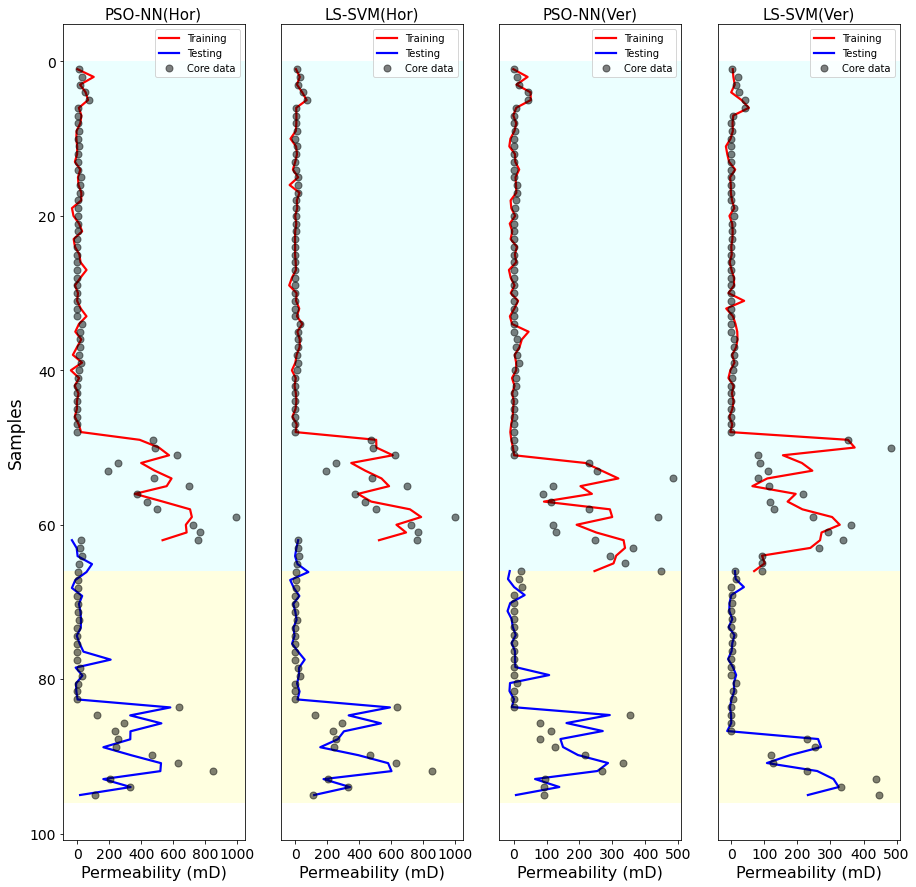

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)

plt.plot(pred_tr1,np.linspace(1,62,62), 'r-', lw=2.2)
plt.plot(pred_ts1,np.linspace(62,95,33), 'b-', lw=2.2)
plt.plot(y_test1,np.linspace(62,95,33), 'ko',markersize=7, alpha=0.5)
plt.legend(['Training','Testing','Core data'])
plt.plot(y_train1,np.linspace(1,62,62),'ko',markersize=7, alpha=0.5)
plt.gca().invert_yaxis()
plt.ylabel('Samples',fontsize=17)
plt.xlabel('Permeability (mD)',fontsize=16)

plt.title('PSO-NN(Hor)',fontsize=15)
plt.axhspan(0, 66, facecolor='cyan', alpha=0.08)
plt.axhspan(66, 96, facecolor='yellow', alpha=0.12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#NextPlot
plt.subplot(1,4,2)
plt.plot(pred_tr3,np.linspace(1,62,62), 'r-', lw=2.2)
plt.plot(pred_ts3,np.linspace(62,95,33), 'b-', lw=2.2)
plt.plot(y_train3,np.linspace(1,62,62),'ko',markersize=7, alpha=0.5)
plt.plot(y_test3,np.linspace(62,95,33), 'ko', markersize=7, alpha=0.5)
plt.gca().invert_yaxis()
#plt.ylabel('samples')
plt.xlabel('Permeability (mD)',fontsize=16)
plt.legend(['Training','Testing','Core data'])
plt.title('LS-SVM(Hor)',fontsize=15)
plt.axhspan(0, 66, facecolor='cyan', alpha=0.08)
plt.axhspan(66, 96, facecolor='yellow', alpha=0.12)
plt.xticks(fontsize=14)
plt.yticks([])

#NextPlot
plt.subplot(1,4,3)
plt.plot(pred_tr2,np.linspace(1,66,66), 'r-', lw=2.2)
plt.plot(pred_ts2,np.linspace(66,95,29), 'b-', lw=2.2)
plt.plot(y_train2,np.linspace(1,66,66),'ko', markersize=7, alpha=0.5)
plt.plot(y_test2,np.linspace(66,95,29), 'ko', markersize=7, alpha=0.5)
plt.gca().invert_yaxis()
#plt.ylabel('samples')
plt.xlabel('Permeability (mD)',fontsize=16)
plt.legend(['Training','Testing','Core data'])
plt.title('PSO-NN(Ver)',fontsize=15)
plt.axhspan(0, 66, facecolor='cyan', alpha=0.08)
plt.axhspan(66, 96, facecolor='yellow', alpha=0.12)
plt.xticks(fontsize=14)
plt.yticks([])
#NextPlot

plt.subplot(1,4,4)
plt.plot(pred_tr4,np.linspace(1,66,66), 'r-', lw=2.2)
plt.plot(pred_ts4,np.linspace(66,95,29), 'b-', lw=2.2)
plt.plot(y_train4,np.linspace(1,66,66),'ko',markersize=7, alpha=0.5)
plt.plot(y_test4,np.linspace(66,95,29), 'ko', markersize=7, alpha=0.5)
plt.gca().invert_yaxis()
#plt.ylabel('samples')
plt.xlabel('Permeability (mD)',fontsize=16)
plt.legend(['Training','Testing','Core data'])
plt.title('LS-SVM(Ver)',fontsize=15)
plt.axhspan(0, 66, facecolor='cyan', alpha=0.08)
plt.axhspan(66, 96, facecolor='yellow', alpha=0.12)
plt.xticks(fontsize=14)
plt.yticks([])

#plt.savefig('result_perm.jpg',dpi=300)

In [ ]:
import pandas as pd
df3=pd.read_excel(r'/content/clastic_result_modified.xlsx',sheet_name='data_plot')
df3.set_index(['metrics'],inplace=True)
df3

,pso_h,pso_v,lssvm_h,lssvm_v,T_H,T_V
metrics,,,,,,
RMSE(Tr),76.380,48.840,67.210,35.220,142.040,69.390
RMSE(Ts),100.830,48.860,83.600,49.860,0.000,0.000
MAE(Tr),42.710,24.580,31.050,19.120,64.140,34.180
MAE(TS),65.170,33.160,45.780,22.310,0.000,0.000
R2(Tr),0.906,0.842,0.932,0.892,0.649,0.650
R2(Ts),0.786,0.764,0.866,0.863,NaN,NaN
CORR(Tr),0.952,0.917,0.963,0.945,0.805,0.807
CORR(Ts),0.887,0.886,0.923,0.935,NaN,NaN
MAXE(Tr),277.880,201.329,234.750,110.704,699.636,275.760


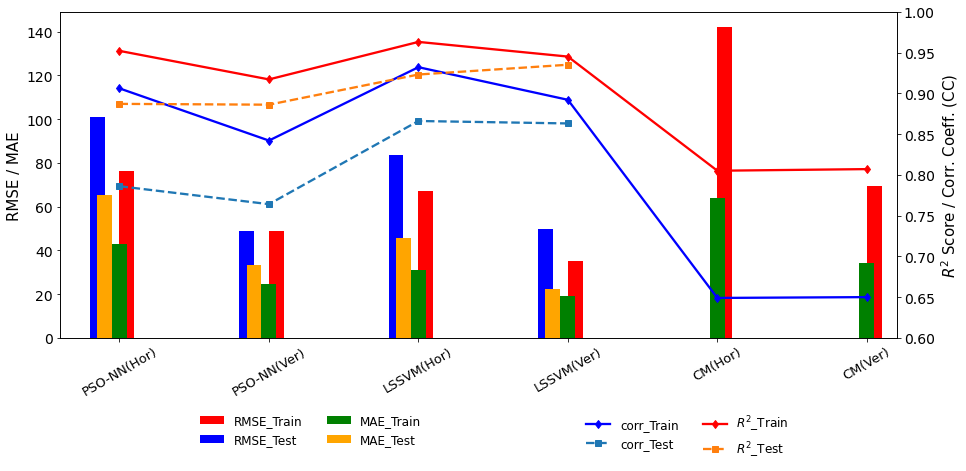

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

width=0.1
df3.loc['RMSE(Tr)'].plot(kind='bar', color='red', ax=ax1,width=width, position=0)
df3.loc['RMSE(Ts)'].plot(kind='bar', color='blue', ax=ax1,width=width,position=2)
df3.loc['MAE(Tr)'].plot(kind='bar', color='green', ax=ax1,width=width,position=0.5) # Train MAE
df3.loc['MAE(TS)'].plot(kind='bar', color='orange', ax=ax1,width=width,position=1.5) # Test MAE

df3.loc['R2(Tr)'].plot(kind='line', lw=2.3, marker='d',color='blue', ax=ax2)
df3.loc['R2(Ts)'].plot(kind='line', lw=2.3, marker='s',linestyle='dashed', ax=ax2)
df3.loc['CORR(Tr)'].plot(kind='line', lw=2.3, marker='d', color='red', ax=ax2)
df3.loc['CORR(Ts)'].plot(kind='line', lw=2.3, marker='s',linestyle='dashed',ax=ax2)
ax1.yaxis.tick_left()

ax2.yaxis.tick_right()

ax1.set_ylabel('RMSE / MAE',fontsize=15)

ax2.set_ylabel('$R^2$ Score / Corr. Coeff. (CC)',fontsize=15)

ax1.set_xticklabels(['PSO-NN(Hor)','PSO-NN(Ver)','LSSVM(Hor)','LSSVM(Ver)','CM(Hor)','CM(Ver)'],rotation = 30,fontsize=13)
ax1.legend(['RMSE_Train','RMSE_Test','MAE_Train','MAE_Test','MAE_TH','MAE_TV'],loc='upper center', bbox_to_anchor=(0.30, -0.2), fancybox=True,frameon=False,fontsize=12,
ncol=2)

ax2.legend(['corr_Train','corr_Test','$R^2$_Train','$R^2$_Test'],loc='upper center', bbox_to_anchor=(0.75, -0.2),fancybox=True,frameon=False,fontsize=12,
ncol=2)
plt.ylim([0.6,1])
ax2.tick_params(axis="y", labelsize=14)

ax1.tick_params(axis="y", labelsize=14)

plt.savefig('ComparisonPlot.jpg',dpi=600,bbox_inches='tight')
plt.show()

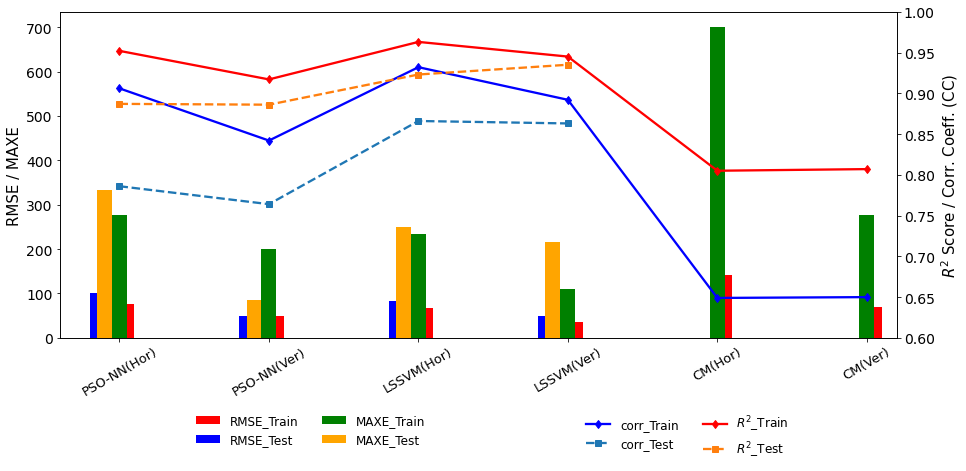

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

width=0.1
df3.loc['RMSE(Tr)'].plot(kind='bar', color='red', ax=ax1,width=width, position=0)
df3.loc['RMSE(Ts)'].plot(kind='bar', color='blue', ax=ax1,width=width,position=2)
df3.loc['MAXE(Tr)'].plot(kind='bar', color='green', ax=ax1,width=width,position=0.5) # Train MAE
df3.loc['MAXE(Ts)'].plot(kind='bar', color='orange', ax=ax1,width=width,position=1.5) # Test MAE

df3.loc['R2(Tr)'].plot(kind='line', lw=2.3, marker='d',color='blue', ax=ax2)
df3.loc['R2(Ts)'].plot(kind='line', lw=2.3, marker='s',linestyle='dashed', ax=ax2)
df3.loc['CORR(Tr)'].plot(kind='line', lw=2.3, marker='d', color='red', ax=ax2)
df3.loc['CORR(Ts)'].plot(kind='line', lw=2.3, marker='s',linestyle='dashed',ax=ax2)
ax1.yaxis.tick_left()

ax2.yaxis.tick_right()

ax1.set_ylabel('RMSE / MAXE',fontsize=15)

ax2.set_ylabel('$R^2$ Score / Corr. Coeff. (CC)',fontsize=15)

ax1.set_xticklabels(['PSO-NN(Hor)','PSO-NN(Ver)','LSSVM(Hor)','LSSVM(Ver)','CM(Hor)','CM(Ver)'],rotation = 30,fontsize=13)
ax1.legend(['RMSE_Train','RMSE_Test','MAXE_Train','MAXE_Test','MAE_TH','MAE_TV'],loc='upper center', bbox_to_anchor=(0.30, -0.2), fancybox=True,frameon=False,fontsize=12,
ncol=2)

ax2.legend(['corr_Train','corr_Test','$R^2$_Train','$R^2$_Test'],loc='upper center', bbox_to_anchor=(0.75, -0.2),fancybox=True,frameon=False,fontsize=12,
ncol=2)
plt.ylim([0.6,1])
ax2.tick_params(axis="y", labelsize=14)

ax1.tick_params(axis="y", labelsize=14)

plt.savefig('ComparisonPlot.jpg',dpi=600,bbox_inches='tight')
plt.show()

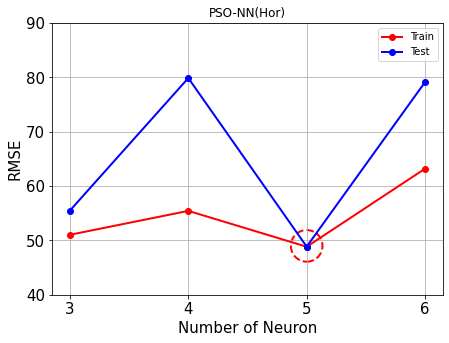

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
%config inlineBackened.figure_format='ratina'

plt.figure(figsize=(7,5))
label=['4','5','6']

tr_n=[51.04,55.44,48.84,63.20]
ts_n=[55.5,79.87,48.86,79.13]
a=[3,4,5,6]
plt.plot(a,tr_n,'-or',lw=2)
plt.plot(a,ts_n,'-ob',lw=2)
plt.ylim([40,90])
plt.scatter(5,49,facecolors='none',edgecolors='red', s=1000,linestyle='--',linewidths=2)
ax=plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('RMSE')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both',labelsize=15)
ax.grid()
ax.set_title('PSO-NN(Hor)')
ax.legend(['Train','Test'])

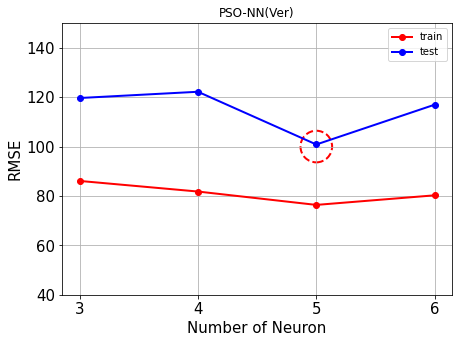

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
%config inlineBackened.figure_format='ratina'

plt.figure(figsize=(7,5))
label=['4','5','6']
x=[1,2,3]
tr_n=[86.084,81.79,76.38,80.26]
ts_n=[119.64,122.17,100.83,116.944]
a=[3,4,5,6]
plt.plot(a,tr_n,'-or',lw=2)
plt.plot(a,ts_n,'-ob',lw=2)
plt.ylim([40,150])
plt.scatter(5,100,facecolors='none',edgecolors='red', s=1000,linestyle='--',linewidths=2)
ax=plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('RMSE')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both',labelsize=15)
ax.grid()
ax.set_title('PSO-NN(Ver)')
ax.legend(['Train','Test'])